In [14]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


### Load data

In [15]:
# df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')

df = pd.read_csv('data/train.csv')
df.drop(columns=['Id'], inplace=True)

display(df.head())

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

target = df['Class']
df = df.drop(columns=['Class'])

train_x, val_x, train_y, val_y = train_test_split(df, target, test_size=0.2, random_state=42)


In [17]:
## Look at summary statistics
display(df.describe())

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,617.000000,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,10.111079,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,2.934025,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,3.583450,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,8.523098,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,9.945452,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,11.516657,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,35.851039,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000


### Impute Missing/NAN data

The amount of missing data as seen above is very negligible, and we don't have a large amount of data so imputing is far more favorable than dropping NaN values. 

In [18]:
from sklearn.impute import SimpleImputer

feature_list = train_x.columns.tolist()

# Handle numeric features
numeric_features = feature_list.copy()
numeric_features.remove('EJ')  # EJ is the only categorical feature
num_imputer = SimpleImputer(strategy='mean')
num_imputer.fit(train_x[numeric_features])
train_x[numeric_features] = num_imputer.transform(train_x[numeric_features])
val_x[numeric_features] = num_imputer.transform(val_x[numeric_features])

# Handle categorical features
categorical_features = ['EJ']
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(train_x[categorical_features])
train_x[categorical_features] = cat_imputer.transform(train_x[categorical_features])
val_x[categorical_features] = cat_imputer.transform(val_x[categorical_features])

# Encode 'EJ' as binary 0/1 (A=0, B=1)
train_x['EJ'] = (train_x['EJ'] == 'B').astype(int)
val_x['EJ'] = (val_x['EJ'] == 'B').astype(int)

### Scale the numeric data

The data is scaled wildy, and has a wide distrobution so this will help significantly. 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x[numeric_features])
train_x[numeric_features] = scaler.transform(train_x[numeric_features])
val_x[numeric_features] = scaler.transform(val_x[numeric_features])

display(train_x.head())

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
530,3.467721,0.898806,-0.252523,7.404421,3.479259,0.626453,-0.318591,0.277248,-0.102247,-0.111570,...,-0.140707,1.487529,-0.063470,-0.122322,0.137313,-0.426529,-0.219871,-0.474489,3.013722,-0.818696
363,-0.158606,0.158262,0.111673,-0.411824,-0.173278,-0.076455,-0.318591,0.043742,-0.067391,-0.696674,...,-0.247273,-0.123113,-0.053902,-0.033191,-0.114374,-0.153680,-0.749480,0.001749,-0.563045,-0.810696
177,-0.054000,-0.467750,-0.199919,0.031757,-0.173278,0.629849,-0.318591,-0.980533,-0.102247,-1.113511,...,-1.159005,-0.228830,-0.063470,-0.258365,-0.913572,-0.426529,-0.712492,2.165110,-1.065435,-0.812208
312,-0.585745,-0.528526,-0.252523,-0.289348,0.299719,-0.633348,1.766762,-0.204089,-0.102247,-0.240922,...,0.988104,-0.439374,-0.063470,-0.253674,-0.262756,-0.426529,-0.491888,0.787312,-0.124169,1.320516
199,-0.629331,-1.019059,-0.212834,-0.424194,-0.173278,-0.378671,-0.318591,-0.443326,-0.102247,-0.619721,...,-0.261087,-0.037448,-0.054108,-0.117631,1.466179,-0.426529,-0.382173,-1.103859,-0.501847,-0.793778


### Create the Logistic Regression and find the best PCA amount

In [20]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def train_model(model, x_train, y_train, x_val, y_val):
    model.fit(x_train, y_train)
    train_preds = model.predict(x_train)
    train_f1 = f1_score(train_preds, y_train)
    
    val_preds = model.predict(x_val)
    val_f1 = f1_score(val_preds, y_val)
    return model, train_f1, val_f1

num_columns = len(train_x.columns.tolist())

results = []

for num_components in range(1, num_columns+1):
    pca = PCA(n_components=num_components)
    compressed_train_x = pca.fit_transform(train_x)
    compressed_val_x = pca.transform(val_x)
    model= LogisticRegression()
    model, train_f1, val_f1 = train_model(model, compressed_train_x,train_y, compressed_val_x, val_y)

    results.append({"pca": pca, "model": model, "train_f1": train_f1, "val_f1":  val_f1})
    print(results[num_components-1]["val_f1"])

0.08333333333333333
0.2
0.375
0.3870967741935484
0.3225806451612903
0.2857142857142857
0.2962962962962963
0.2857142857142857
0.2857142857142857
0.5882352941176471
0.5882352941176471
0.5555555555555556
0.5789473684210527
0.5945945945945946
0.5945945945945946
0.5945945945945946
0.5555555555555556
0.5945945945945946
0.5945945945945946
0.5789473684210527
0.6153846153846154
0.6153846153846154
0.6153846153846154
0.5789473684210527
0.6341463414634146
0.6341463414634146
0.65
0.6341463414634146
0.6153846153846154
0.5405405405405406
0.5789473684210527
0.5789473684210527
0.5789473684210527
0.5405405405405406
0.6153846153846154
0.5789473684210527
0.6829268292682927
0.6829268292682927
0.6829268292682927
0.6829268292682927
0.6190476190476191
0.6511627906976745
0.6190476190476191
0.5853658536585366
0.5853658536585366
0.6511627906976745
0.5853658536585366
0.5853658536585366
0.5853658536585366
0.6818181818181818
0.6818181818181818
0.6818181818181818
0.6818181818181818
0.6818181818181818
0.6818181818181

## Graph the performance of the different PCA compression levels

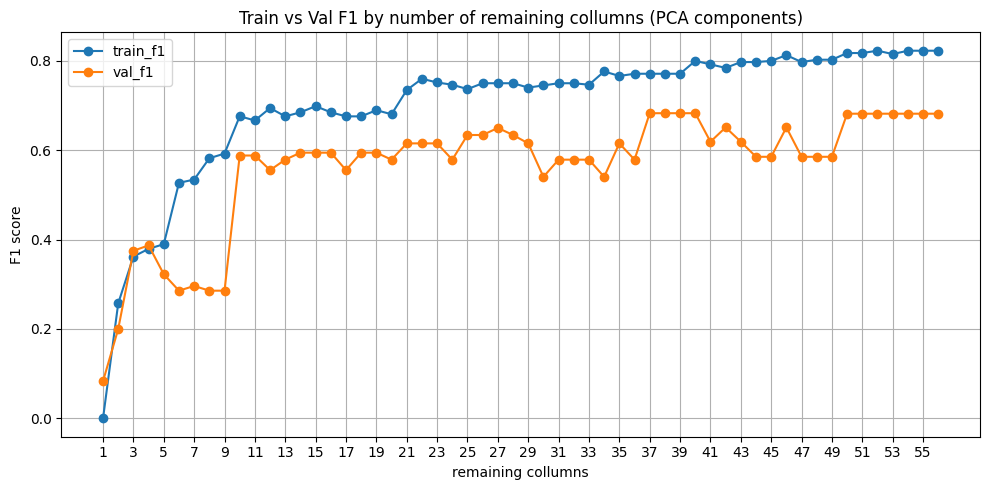

In [21]:
import matplotlib.pyplot as plt

train_scores = [r['train_f1'] for r in results]
val_scores = [r['val_f1'] for r in results]
x = list(range(1, num_columns + 1))

plt.figure(figsize=(10, 5))
plt.plot(x, train_scores, marker='o', label='train_f1')
plt.plot(x, val_scores, marker='o', label='val_f1')
plt.xlabel('remaining collumns')
plt.ylabel('F1 score')
plt.title('Train vs Val F1 by number of remaining collumns (PCA components)')
# reduce number of x-ticks when many points
if len(x) > 30:
    plt.xticks(range(1, num_columns + 1, max(1, num_columns // 20)))
else:
    plt.xticks(x)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Export the predictions for the logistic regression model

In [22]:
# test_df = pd.read_csv('data/test.csv')
test_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')

# Prepare test features
test_x = test_df.drop(columns=['Id']).copy()

# Impute numeric features
test_x[numeric_features] = num_imputer.transform(test_x[numeric_features])

# Impute categorical 'EJ' and encode to 0/1
test_x[categorical_features] = cat_imputer.transform(test_x[categorical_features])
test_x['EJ'] = (test_x['EJ'] == 'B').astype(int)

# Scale numeric features
test_x[numeric_features] = scaler.transform(test_x[numeric_features])

# Predict probabilities (binary)
prediction = model.decision_function(test_x)


submission = pd.DataFrame({
    'Id': test_df['Id'].values,
    'class_0': 1- prediction,
    'class_1': prediction
})

submission.to_csv('submission.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/icr-identify-age-related-conditions/test.csv'